In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d
import copy
import plotly.express as px
import pandas as pd

In [2]:
x = np.linspace(0,5, num =100)
y = 2*x+3
eps = np.random.normal(loc=0.0, scale=1, size=100)
y1 = y +eps

In [3]:
def buoc1(x,y):
    tongx = sum(x)
    tongy = sum(y)
    tong_x_nhan_y = sum(x*y)
    tongx_binh = sum(x**2)
    return tongx, tongy, tong_x_nhan_y, tongx_binh

In [4]:
tongx, tongy, tong_x_nhan_y, tongx_binh = buoc1(x, y1)
print(tongx, tongy, tong_x_nhan_y, tongx_binh)

249.99999999999997 807.5831177089494 2437.016494930287 837.5420875420876


In [5]:
def buoc2(x,y):
    tongx, tongy, tong_x_nhan_y, tongx_binh = buoc1(x,y)
    n = len(x)
    beta1 = (tong_x_nhan_y - ((1/n)*tongx*tongy))/(tongx_binh - (1/n)*tongx**2)
    beta0 = 1/n* tongy - (1/n * tongx)*beta1
    print('Phuong trinh co dang: ', beta0 ,'+', beta1, '*x')
    return beta0, beta1


In [6]:
beta0, beta1 = buoc2(x,y1)
y_predict = beta0+beta1*x

Phuong trinh co dang:  3.1584674505389874 + 1.966945490620203 *x


Text(0.5, 1.0, 'Linear Regression')

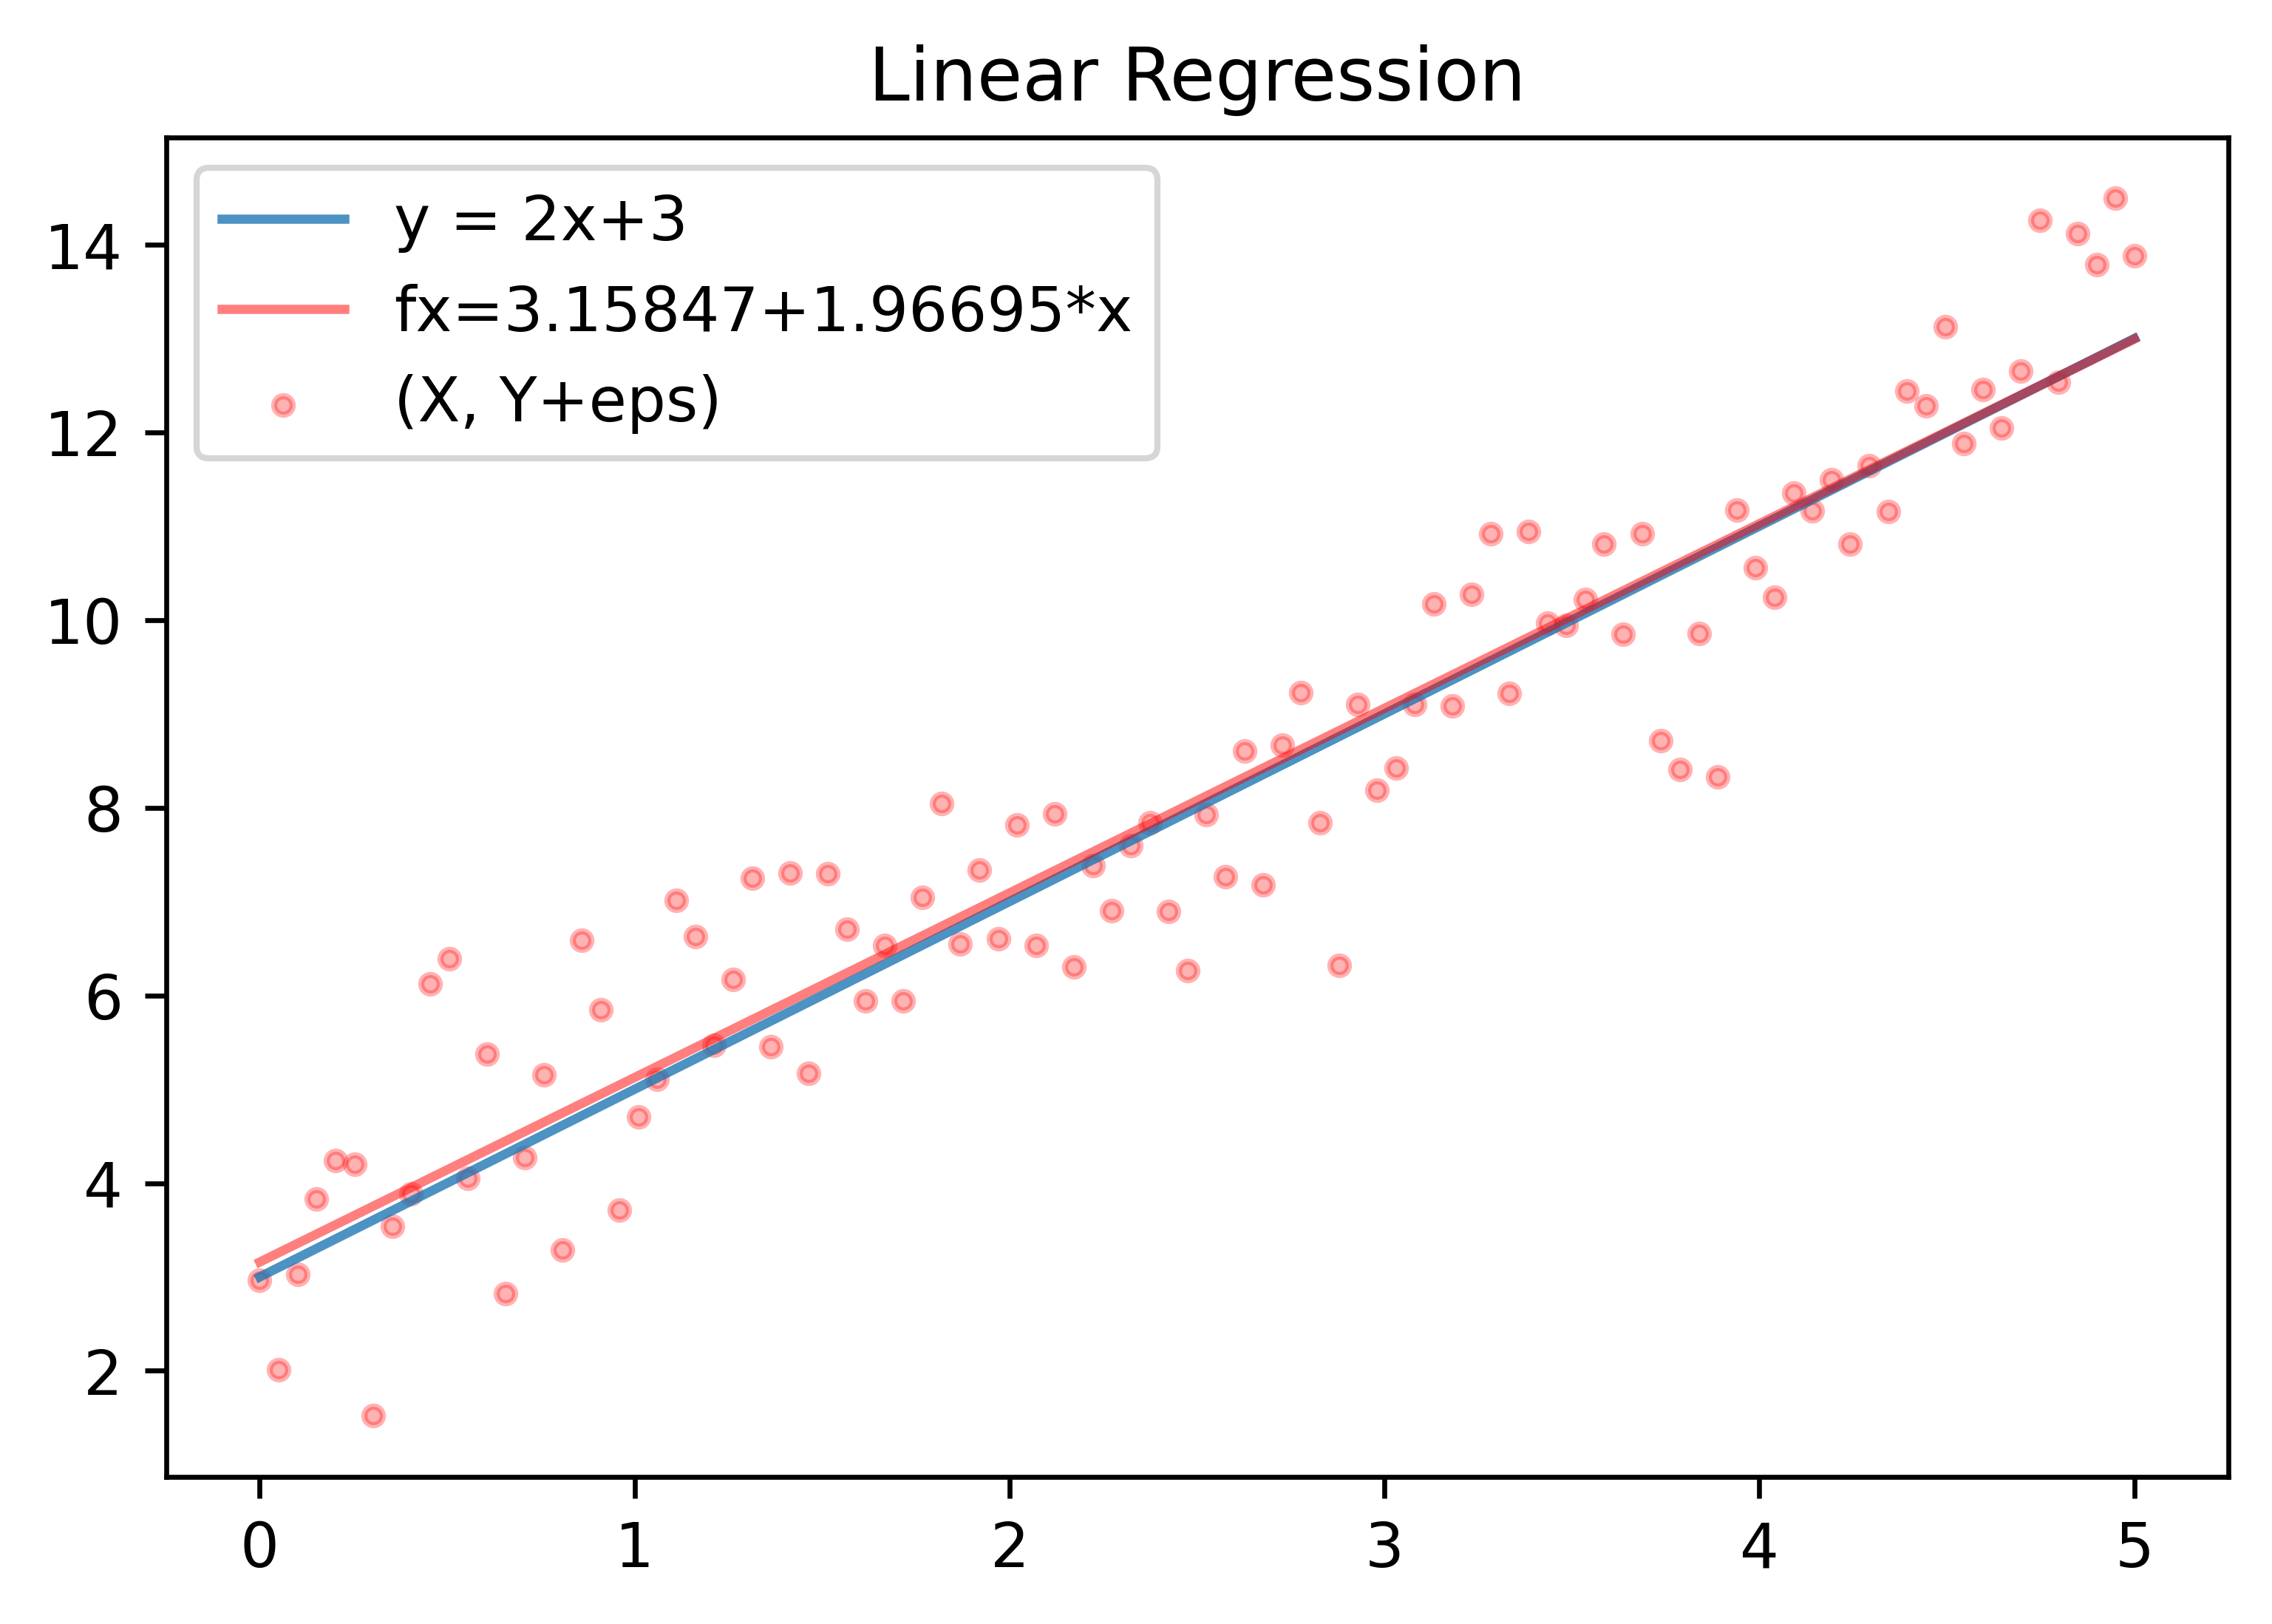

In [7]:
plt.rcParams["figure.dpi"] = 600
plt.plot(x,y, label = 'y = 2x+3', alpha=0.8)
plt.plot(x,y_predict, label = 'fx={}+{}*x'.format(round(beta0,5), round(beta1,5)), color='red', alpha = 0.5)
plt.scatter(x,y1, color = 'red', alpha = 0.3, marker='.', label= '(X, Y+eps)')
plt.legend()
plt.title('Linear Regression')

In [8]:
## Multivariable linear regression

In [9]:
x= np.linspace(0,5, num =10)
X = [[a, b] for a in x for b in x]
###
def generate_Y(x):
    Y = []
    for item in range(len(x)):
        y = 3+5*X[item][0]-4*X[item][1]
        Y.append(y)
    eps = np.random.uniform(-1,1, size=len(x))
    y1 = Y+eps
    return Y, y1

In [10]:
Y, y1 = generate_Y(X)
print(X[0], X[-1])
print(Y[:3], y1[:3])


[0.0, 0.0] [5.0, 5.0]
[3.0, 0.7777777777777777, -1.4444444444444446] [ 3.83964383  1.36931302 -1.56657113]


In [11]:
def beta(x,y):
    x_new = copy.deepcopy(x)
    for item in x_new:
        item.insert(0,1)
    x = np.array(x_new)
    ### Ma tran chuyen vi Xt
    xt = x.T
    ### XtX, XtY
    XtX = np.matmul(xt, x)
    XtY = np.matmul(xt, y)
    ### Inverse XtX
    XtX_inv = np.linalg.inv(XtX)
    beta = np.matmul(XtX_inv, XtY)
    print('Phuong trinh co dang: ', beta[0] ,'+', beta[1], '*x1', '+', beta[2], '*x2')
    return beta

In [12]:
beta = beta(X,y1)

Phuong trinh co dang:  3.2321204874777965 + 4.97822113681424 *x1 + -4.065933300619977 *x2


In [13]:
X1 = []
X2 = []
for item in range(len(X)):
    X1.append(X[item][0])
    X2.append(X[item][1])
X1 = np.array(X1)
X2 = np.array(X2)
predict_y = beta[0] +beta[1]*X1+ beta[2]*X2

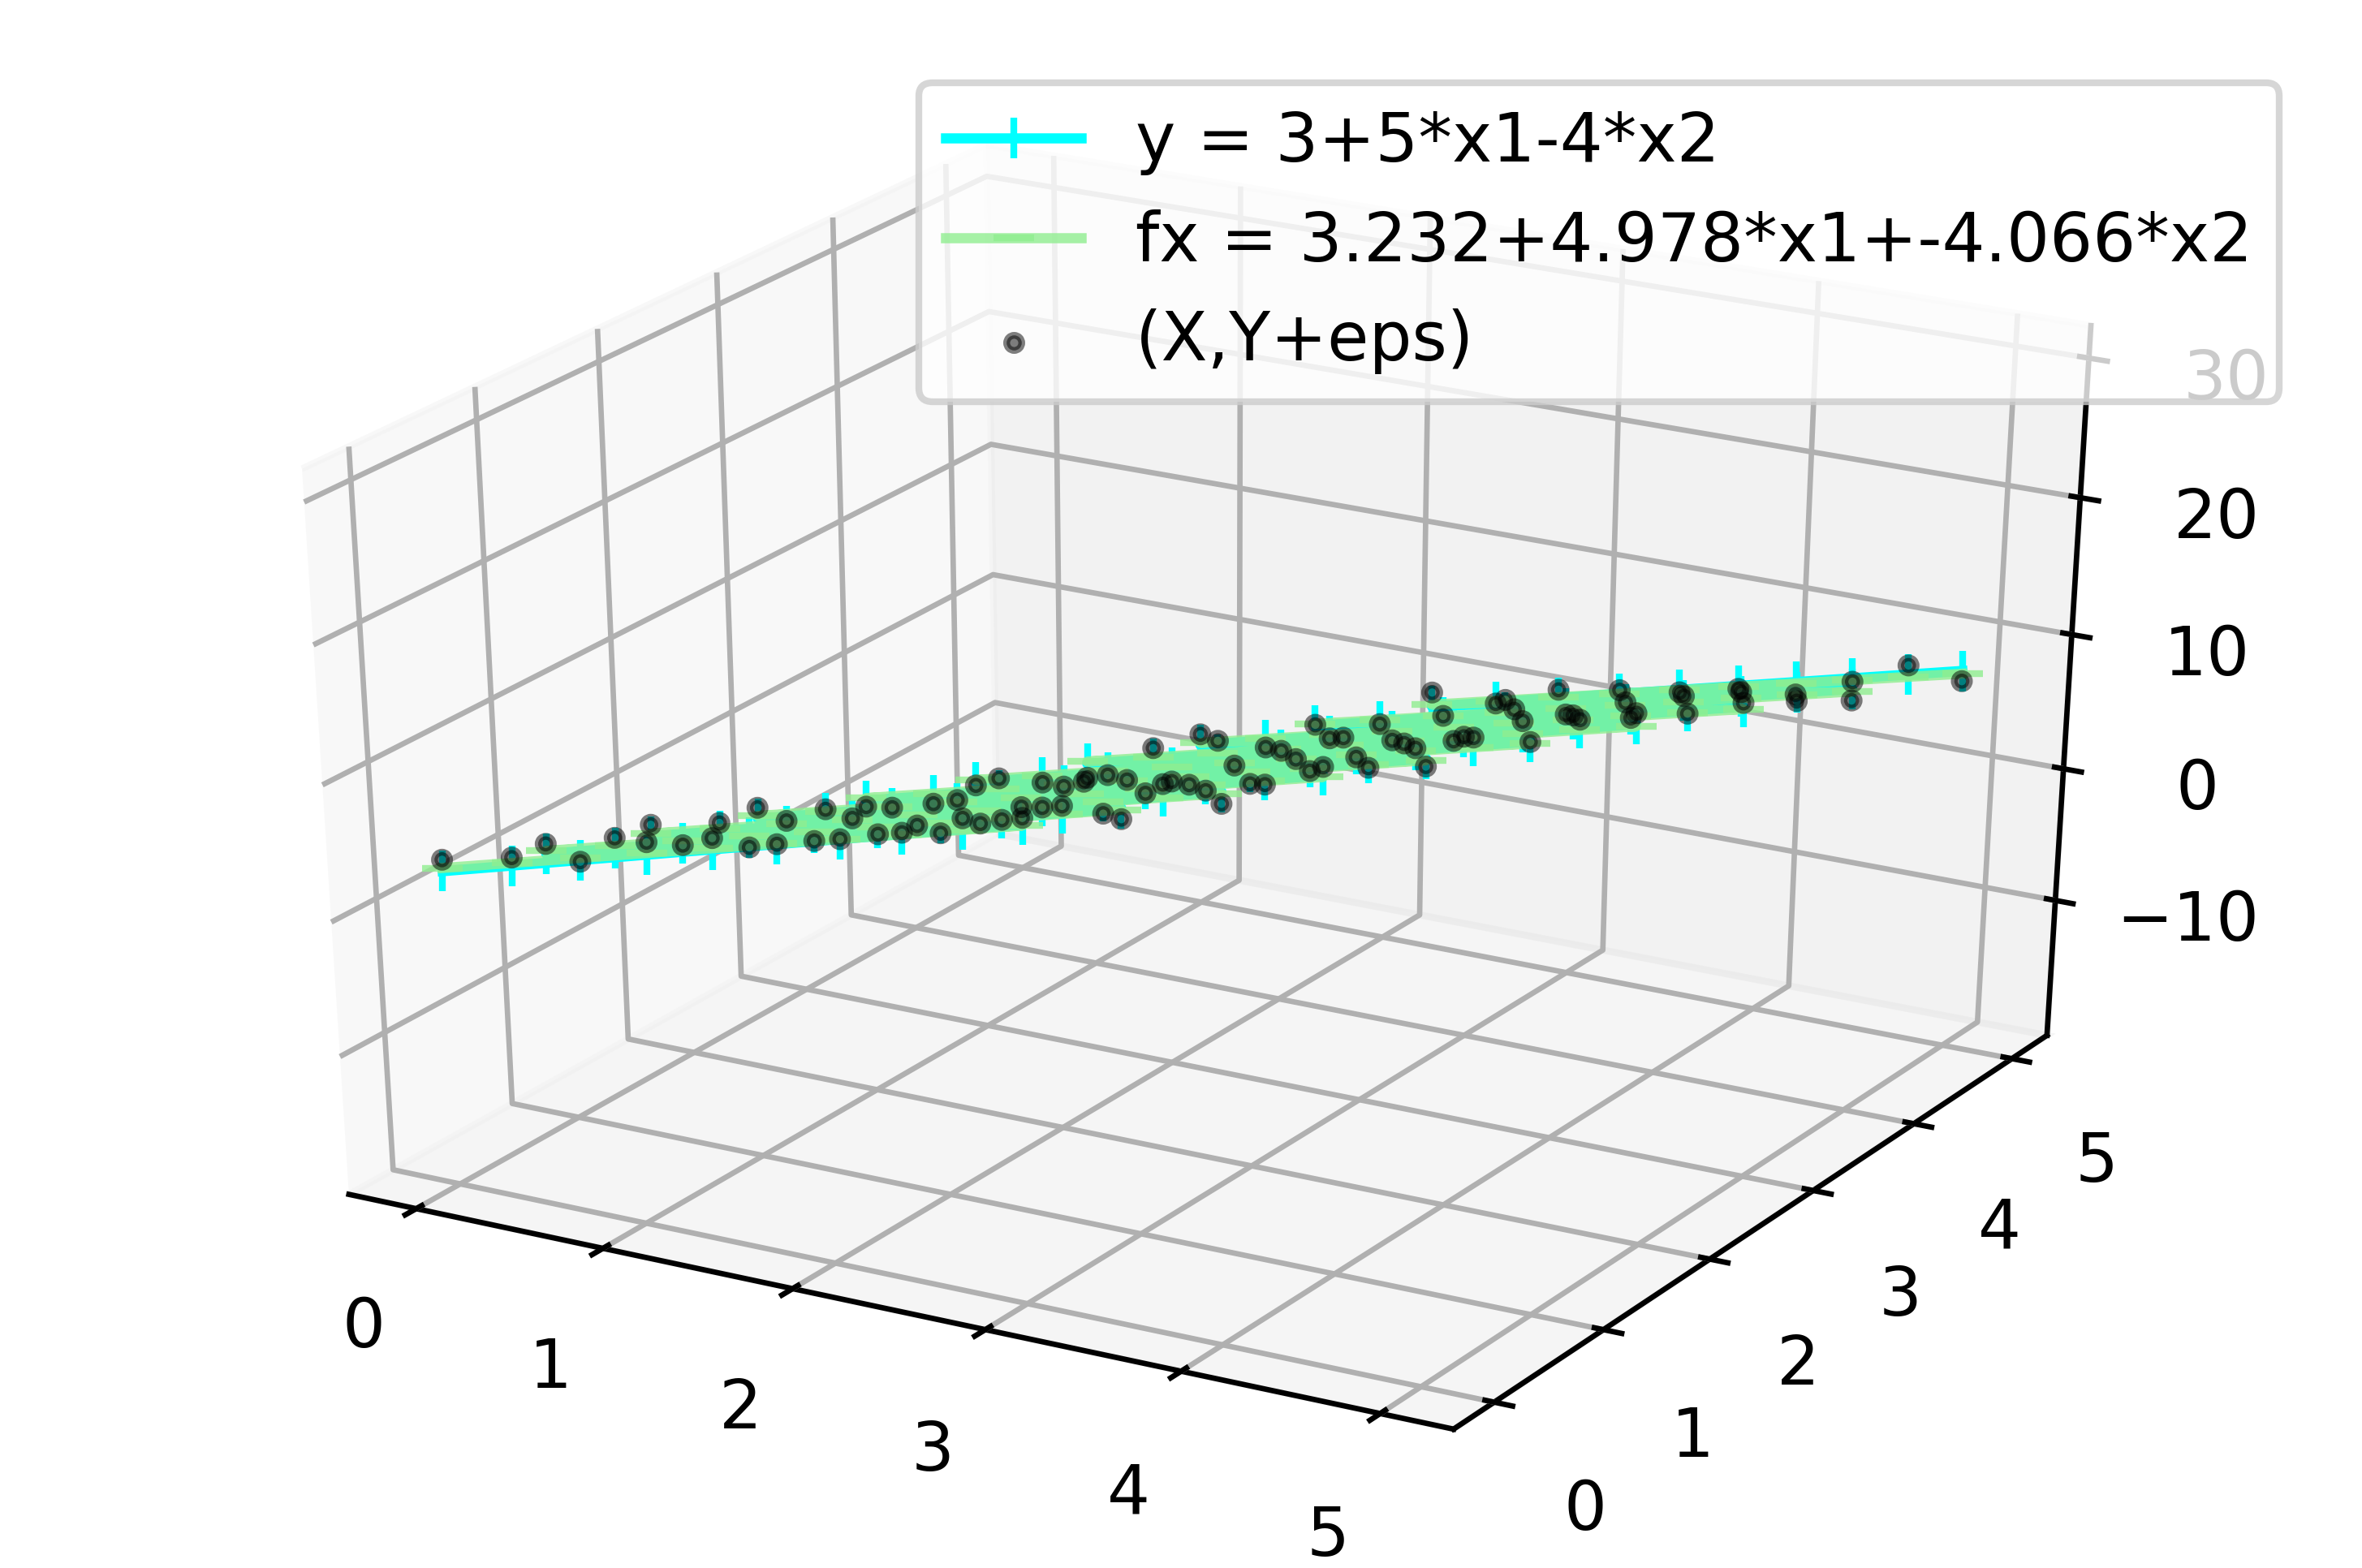

In [14]:
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.plot3D(X1, X2, Y, color = 'cyan', label = 'y = 3+5*x1-4*x2', marker = '|')
ax.plot3D(X1, X2, predict_y, 'lightgreen', alpha = 0.8, label = 'fx = {}+{}*x1+{}*x2'.format(round(beta[0],3), round(beta[1],3), round(beta[2],3)), marker = '_')
ax.scatter3D(X1, X2, y1, color = 'black', alpha = 0.5, marker ='.', label = '(X,Y+eps)')
plt.legend()

In [15]:
df = pd.DataFrame(dict(
    X=X1, 
    Y=X2, 
    Z=Y,
    Z2 = predict_y,
    Z3 = y1
))
fig = px.line_3d(df, x='X', y='Y', z='Z', title = 'y = 3+5*x1-4*x2')
fig.add_scatter3d(x=df['X'], y=df['Y'], z=df['Z2'], name ='fx = {}+{}*x1+{}*x2'.format(round(beta[0],3), round(beta[1],3), round(beta[2],3)),mode='lines', marker = dict(size = 5, color='green'))
fig.add_scatter3d(x=df['X'], y=df['Y'], z=df['Z3'], name = '(X,Y+eps)', mode = 'markers', marker = dict(size = 5, color='black'))
fig.show()